# In this notebook we'll find the following insights about the Aviation Accident data of 2014 - 2024.
* ## Which Day had the most and least accidents.
* ## Which month had most and least accidents.

# Analysing the raw data scraped from NTSB. 
### Note : The CSV file is included in the repo.

In [1]:
# importing the required libraries.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the data from csv.
df = pd.read_csv('ntsb_raw_data.csv')

In [4]:
df = df.dropna(axis=1, how='all') # drop columns having all null values.
# Selecting only relevant columns.
simplified_df = df[['NtsbNo', 'CompletionStatus', 'EventType', 'EventDate', 'City', 'State', 'Country', 'VehicleMake', 'VehicleModel', 'HighestInjuryLevel', 'InjuryOngroundCount', 'InjuryOnboardCount', 'Mode']]

In [5]:
simplified_df['EventDate'] = pd.to_datetime(simplified_df['EventDate']) # changing datatype of EvenDate column to datatime.
simplified_df['Aircraft'] = simplified_df['VehicleMake'] + '/' + simplified_df['VehicleModel'] # making a column for aircraft by combining make and model
simplified_df['EventDay'] = simplified_df['EventDate'].dt.day_name() # making a new column for event day by using event date.


C:\Users\sys_a\AppData\Local\Temp\ipykernel_27436\939860571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified_df['EventDate'] = pd.to_datetime(simplified_df['EventDate']) # changing datatype of EvenDate column to datatime.
C:\Users\sys_a\AppData\Local\Temp\ipykernel_27436\939860571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified_df['Aircraft'] = simplified_df['VehicleMake'] + '/' + simplified_df['VehicleModel'] # making a column for aircraft by combining make and model
C:\Users\s

### Let's find out which Week days have had most accidents.

In [10]:

day_df = simplified_df.groupby('EventDay')[['NtsbNo']].count() # data frame of weekdays and their corresponding number of accidents
day_df = day_df.sort_values(by=['NtsbNo'], ascending=False) #sorting for most accident day to be on top
day_df


,NtsbNo
EventDay,
Saturday,2910
Sunday,2566
Friday,2540
Thursday,2348
Wednesday,2331
Tuesday,2175
Monday,2163


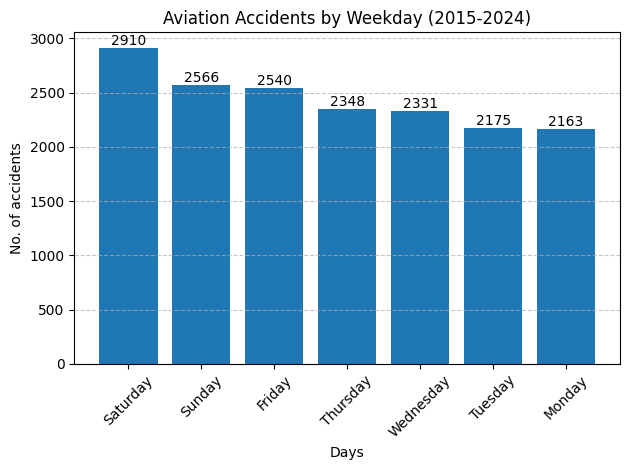

In [9]:
p = plt.bar(day_df.index, day_df['NtsbNo'])
plt.title('Aviation Accidents by Weekday (2015-2024)')
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.bar_label(p)
plt.xlabel('Days')
plt.ylabel('No. of accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Insights:
### Well, as we can see Saturday has most accidents in the 10 years period time from 2014 - 2024. While Mondays have been the safest.

# Next
### Now let's find out which month has the most and least number of accidents in 10 years.

In [14]:
simplified_df['EventMonth'] = simplified_df['EventDate'].dt.month_name() # making a new column for event day by using event date.

C:\Users\sys_a\AppData\Local\Temp\ipykernel_27436\3256401268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified_df['EventMonth'] = simplified_df['EventDate'].dt.month_name() # making a new column for event day by using event date.


In [ ]:
month_df = simplified_df.groupby('EventMonth')[['NtsbNo']].count() # data frame of Months and their corresponding number of accidents
month_df = month_df.sort_values(by=['NtsbNo'], ascending=False) #sorting for most accident day to be on top
month_df

,NtsbNo
EventMonth,
July,2034
June,1850
August,1813
September,1612
May,1580
October,1430
March,1275
April,1251
November,1101


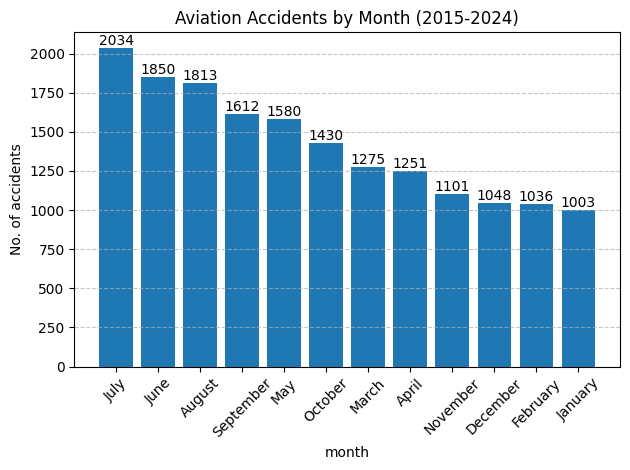

In [15]:
# plotting a bar chart for the data
p = plt.bar(month_df.index, month_df['NtsbNo'])
plt.title('Aviation Accidents by Month (2015-2024)')
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.bar_label(p)
plt.xlabel('month')
plt.ylabel('No. of accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Findings:
### According the NTSB data of 2014 to 2024. July has had more than double accidents than January. Intresting!!!